In [6]:
import matplotlib.pyplot as plt

import pywt

### Plot Scaling and Wavelet functions for the Wavelets 

Wavelet Wavelet coif2
  Family name:    Coiflets
  Short name:     coif
  Filters length: 12
  Orthogonal:     True
  Biorthogonal:   True
  Symmetry:       near symmetric
  DWT:            True
  CWT:            False
Filter bank ([-0.000720549445520347, -0.0018232088709110323, 0.005611434819368834, 0.02368017194684777, -0.05943441864643109, -0.07648859907828076, 0.4170051844232391, 0.8127236354494135, 0.3861100668227629, -0.0673725547237256, -0.04146493678687178, 0.01638733646320364], [-0.01638733646320364, -0.04146493678687178, 0.0673725547237256, 0.3861100668227629, -0.8127236354494135, 0.4170051844232391, 0.07648859907828076, -0.05943441864643109, -0.02368017194684777, 0.005611434819368834, 0.0018232088709110323, -0.000720549445520347], [0.01638733646320364, -0.04146493678687178, -0.0673725547237256, 0.3861100668227629, 0.8127236354494135, 0.4170051844232391, -0.07648859907828076, -0.05943441864643109, 0.02368017194684777, 0.005611434819368834, -0.0018232088709110323, -0.000720549

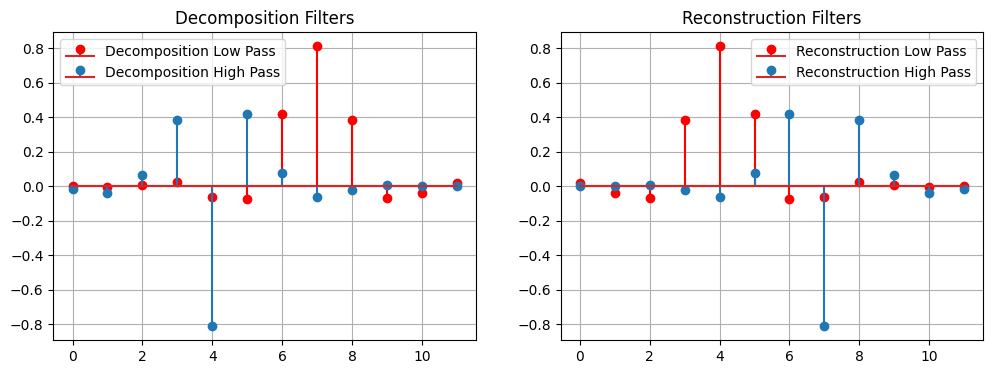

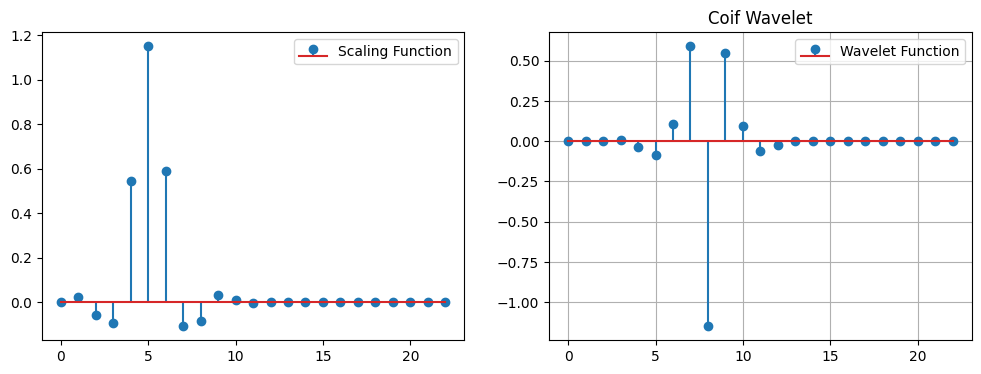

In [7]:
w = pywt.Wavelet('coif2')
print("Wavelet", w)
print("Filter bank", w.filter_bank)
print("dec_lo", w.dec_lo)
print("dec_hi", w.dec_hi)
print("rec_lo", w.rec_lo)
print("rec_hi", w.rec_hi)

# plot the decomposition and reconstruction filters
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.stem(w.dec_lo, label="Decomposition Low Pass", linefmt="-r")
plt.stem(w.dec_hi, label="Decomposition High Pass")
plt.legend()
plt.title("Decomposition Filters")
plt.grid(True)

plt.subplot(122)
plt.stem(w.rec_lo, label="Reconstruction Low Pass", linefmt="-r")
plt.stem(w.rec_hi, label="Reconstruction High Pass")
plt.legend()
plt.title("Reconstruction Filters")
plt.grid(True)


phi, psi, x = w.wavefun(level=1)

print("Scaling Coefficients", phi)
print("Detail Coefficients", psi)
print("Number of vanishing moments in detail", w.vanishing_moments_psi)
print("Number of vanishing moments in scale", w.vanishing_moments_phi)

# plot the wavelet as stem plot with linespace
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.stem(phi, label="Scaling Function")
plt.legend()
plt.subplot(122)
plt.stem(psi, label="Wavelet Function")
plt.legend()
plt.title("Coif Wavelet")
plt.grid(True)

# DTCWT Demonstration

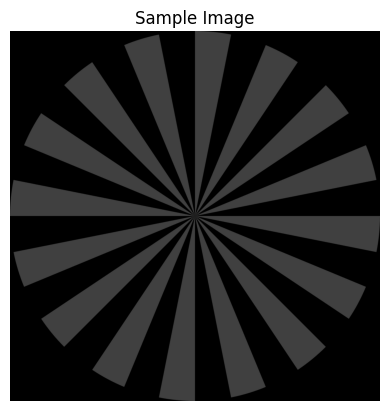

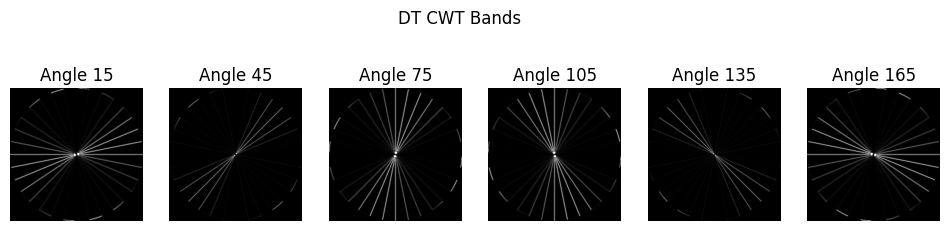

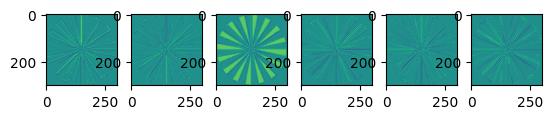

In [8]:
# Load the mandrill image
mandrill = plt.imread("../star.png")
mandrill = mandrill.mean(axis=2)

# Show mandrill
plt.figure(1)
plt.axis('off')
plt.title("Sample Image")
plt.imshow(mandrill, cmap='gray', clim=(0,1))

import dtcwt
import numpy as np
transform = dtcwt.Transform2d()

# Compute two levels of dtcwt with the defaul wavelet family
mandrill_t = transform.forward(mandrill, nlevels=2)

# Show the absolute images for each direction in level 2.
# Note that the 2nd level has index 1 since the 1st has index 0.
labels = [15, 45, 75, 105, 135, 165]
plt.figure(2, figsize=(12, 3))
plt.suptitle("DT CWT Bands")
for slice_idx in range(mandrill_t.highpasses[1].shape[2]):
    plt.subplot(1, 6, slice_idx + 1)
    plt.axis('off')
    plt.title(f"Angle {labels[slice_idx]}")
    plt.imshow(5 * (np.abs(mandrill_t.highpasses[1][:,:,slice_idx])), cmap="gray", clim=(0, 1))



# Show the phase images for each direction in level 2.
plt.figure(3)
for slice_idx in range(mandrill_t.highpasses[1].shape[2]):
    plt.subplot(1, 6, slice_idx + 1)
    plt.imshow(np.angle(mandrill_t.highpasses[1][:,:,slice_idx]), cmap="viridis", clim=(-np.pi, np.pi))

In [9]:
import dtcwt.coeffs


coeefs = dtcwt.coeffs.biort('near_sym_a')
h0, g0, h1, g1 = coeefs

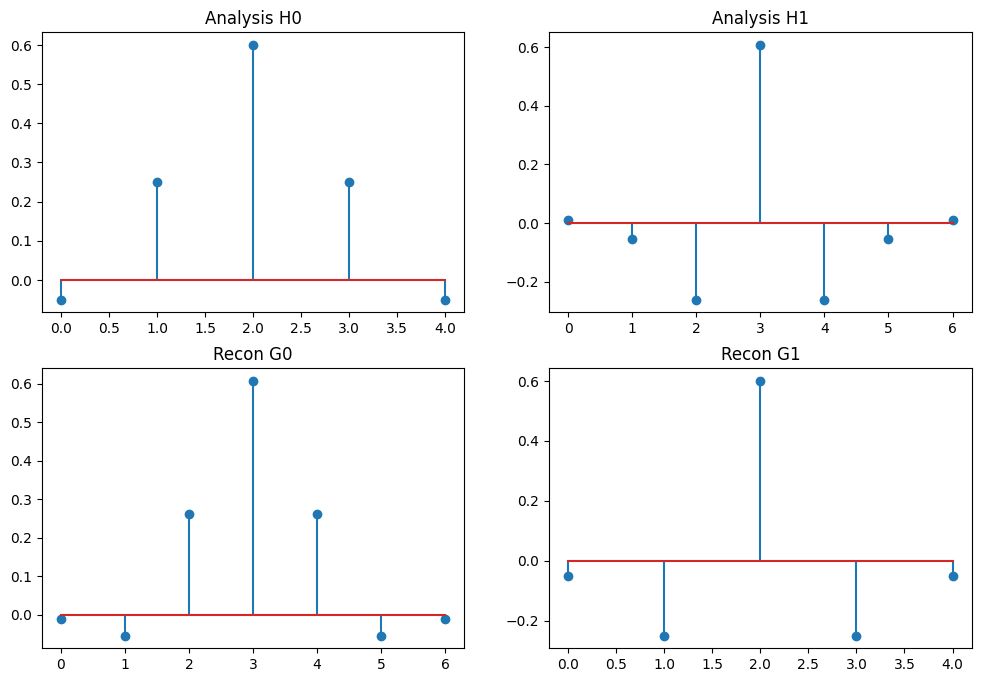

In [10]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.stem(h0)
plt.title("Analysis H0")

plt.subplot(2, 2, 2)
plt.stem(h1)
plt.title("Analysis H1")

plt.subplot(2, 2, 3)
plt.stem(g0)
plt.title("Recon G0")

plt.subplot(2, 2, 4)
plt.stem(g1)
plt.title("Recon G1")

plt.show()

Text(0.5, 1.0, 'Adding 5 tap LP and 7 tap HP')

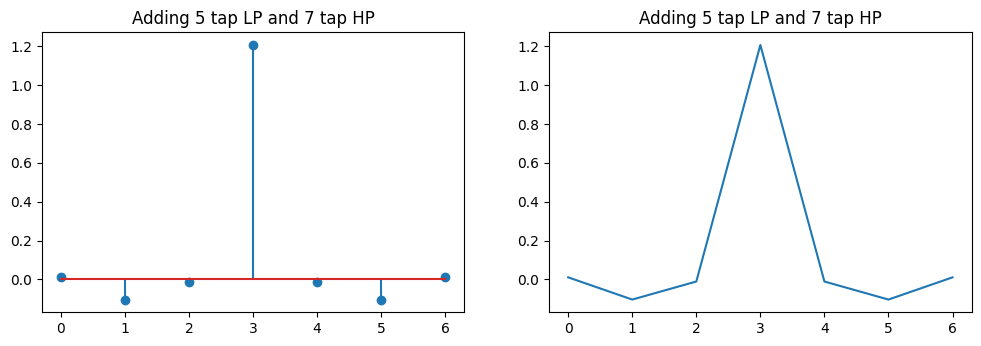

In [13]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
a = np.asarray([0] + list(h0.reshape(-1, )) + [0])
b = h1.reshape(-1)
plt.stem(a + b)
plt.title("Adding 5 tap LP and 7 tap HP")

plt.subplot(2, 2, 2)
plt.plot(a + b)
plt.title("Adding 5 tap LP and 7 tap HP")